# Titanic

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [168]:
titanic = pd.read_csv('./dataset/titanic.csv')

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,lost,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,saved,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,saved,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,saved,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,lost,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [169]:
df = titanic.copy()

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.duplicated().sum()

0

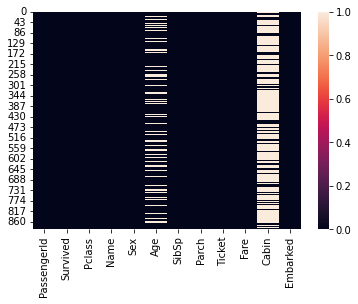

In [18]:
sns.heatmap(data=df.isna())
plt.show()

In [19]:
#!pip install missingno     # 결측치 

In [26]:
import missingno

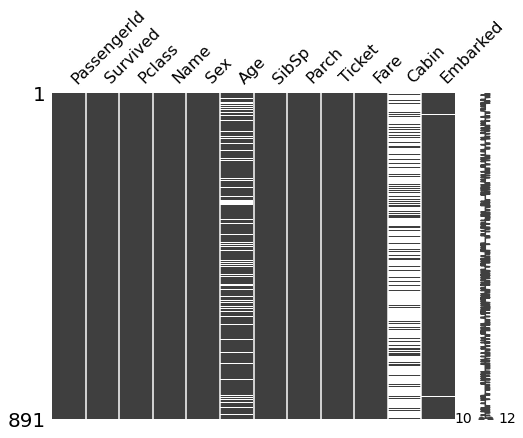

In [30]:
missingno.matrix(df, figsize=(8,6))
plt.show()

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<AxesSubplot:xlabel='Survived', ylabel='count'>

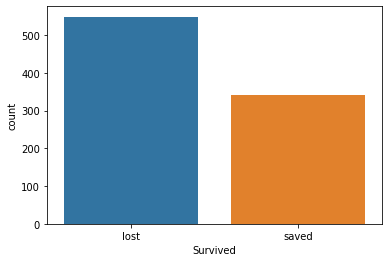

In [33]:
sns.countplot(data=df, x='Survived')

In [44]:
df['Survived'].value_counts() / df.shape[0]

lost     0.616162
saved    0.383838
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

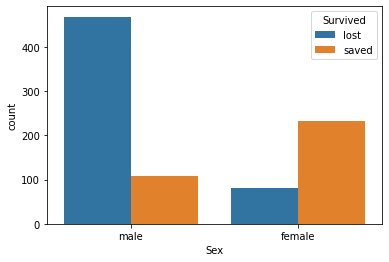

In [56]:
sns.countplot(data=df, x='Sex', hue='Survived')

In [143]:
df.groupby(['Embarked', 'Sex', 'Survived']).count()['PassengerId'].index

MultiIndex([('C', 'female',  'lost'),
            ('C', 'female', 'saved'),
            ('C',   'male',  'lost'),
            ('C',   'male', 'saved'),
            ('Q', 'female',  'lost'),
            ('Q', 'female', 'saved'),
            ('Q',   'male',  'lost'),
            ('Q',   'male', 'saved'),
            ('S', 'female',  'lost'),
            ('S', 'female', 'saved'),
            ('S',   'male',  'lost'),
            ('S',   'male', 'saved')],
           names=['Embarked', 'Sex', 'Survived'])

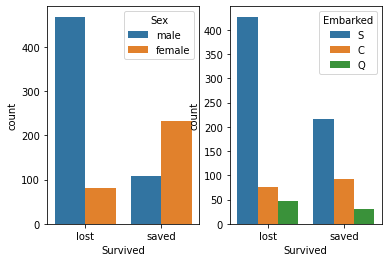

In [145]:
fig, axes = plt.subplots(1, 2)
sns.countplot(x='Survived', hue='Sex', data=df, ax=axes[0])
sns.countplot(x='Survived', hue='Embarked', data=df, ax=axes[1])

plt.show()

In [212]:
df = titanic.copy()
df.drop(columns=['PassengerId', 'Cabin'], axis=1, inplace=True)
df.drop(columns=['Ticket'], axis=1, inplace=True)

In [215]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [216]:
df.loc[df['Survived']=='saved', 'Survived'] = 1  # Survived : 1, 0
df.loc[df['Survived']=='lost', 'Survived'] = 0  # Survived : 1, 0

df['Pclass'] = df['Pclass'].map({'1st': 0, '2nd': 1, '3rd': 2}) # Pclass: 0, 1, 2

df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})  # Sex: male=1, female=0

df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Embarked: c=0, Q=1, S=2
df['Embarked'] = df['Embarked'].fillna(2)

In [222]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [220]:
df['Embarked'] = df['Embarked'].map(int)

In [221]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,0,2,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,1,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,2
887,1,0,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,2
888,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,2
889,1,0,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,0


## Age 결측치 채우기

In [309]:
df = titanic.copy()
df.drop(columns=['PassengerId', 'Cabin'], axis=1, inplace=True)
df.drop(columns=['Ticket'], axis=1, inplace=True)
df.loc[df['Survived']=='saved', 'Survived'] = 1  # Survived : 1, 0
df.loc[df['Survived']=='lost', 'Survived'] = 0  # Survived : 1, 0

df['Pclass'] = df['Pclass'].map({'1st': 0, '2nd': 1, '3rd': 2}) # Pclass: 0, 1, 2

df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})  # Sex: male=1, female=0

df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Embarked: c=0, Q=1, S=2
df['Embarked'] = df['Embarked'].fillna(2).map(int)

In [310]:
df['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [311]:
df[df['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,2,"Moran, Mr. James",1,NaN,0,0,8.4583,1
17,1,1,"Williams, Mr. Charles Eugene",1,NaN,0,0,13.0000,2
19,1,2,"Masselmani, Mrs. Fatima",0,NaN,0,0,7.2250,0
26,0,2,"Emir, Mr. Farred Chehab",1,NaN,0,0,7.2250,0
28,1,2,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,7.8792,1
...,...,...,...,...,...,...,...,...,...
859,0,2,"Razi, Mr. Raihed",1,NaN,0,0,7.2292,0
863,0,2,"Sage, Miss. Dorothy Edith ""Dolly""",0,NaN,8,2,69.5500,2
868,0,2,"van Melkebeke, Mr. Philemon",1,NaN,0,0,9.5000,2
878,0,2,"Laleff, Mr. Kristo",1,NaN,0,0,7.8958,2


In [312]:
df['Initial'] = df.Name.str.extract("([a-zA-Z]+)\.")  # 정규표현식, '.' 앞에 있는 str(Mr, Mrs, Miss, ...)

In [313]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,Mr
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,Mrs
2,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,Miss
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,Mrs
4,0,2,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,1,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,2,Rev
887,1,0,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,2,Miss
888,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,2,Miss
889,1,0,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,0,Mr


In [314]:
df['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [315]:
ae = ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer']
be = ['Mr', 'Mrs', 'Miss', 'Master',     'Mr', 'Other', 'Mr', 'Mrs', 'Miss', 'Mr', 'Miss', 'Mr', 'Mrs', 'Other', 'Mr', 'Mrs', 'Other']
df['Initial'] = df['Initial'].replace(ae, be)

In [316]:
df['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [317]:
age_mean = round(df.groupby(by=['Initial']).Age.mean(), 1)

In [318]:
age_mean

Initial
Master     4.6
Miss      22.0
Mr        32.7
Mrs       35.6
Other     45.9
Name: Age, dtype: float64

In [319]:
for ind in age_mean.index:
    df.loc[(df['Initial']==ind) & (df['Age'].isna()), 'Age'] = age_mean[ind]

In [320]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Initial     0
dtype: int64

In [321]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,Mr
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,Mrs
2,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,Miss
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,Mrs
4,0,2,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,1,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,2,Other
887,1,0,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,2,Miss
888,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,22.0,1,2,23.4500,2,Miss
889,1,0,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,0,Mr


In [368]:
Embarked = pd.get_dummies(df["Embarked"])
Embarked.columns=['C', 'Q', 'S']
df_concatenated = pd.concat([df, Embarked], axis=1)

In [369]:
df_concatenated.drop(columns=['Embarked', 'Initial', 'Name'], inplace=True)

In [372]:
df_concatenated['Survived'].unique()

array([0, 1], dtype=object)

In [374]:
df_concatenated = df_concatenated.to_numpy().astype(np.float64)

In [375]:
df_concatenated

array([[0., 2., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 2., 0., ..., 0., 0., 1.],
       ...,
       [0., 2., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 2., 1., ..., 0., 1., 0.]])

In [376]:
np.savez('./dataset/titanic_preprocessed', df_concatenated=df_concatenated)

In [378]:
df_load = np.load('./dataset/titanic_preprocessed.npz')

In [379]:
df_load['df_concatenated']

array([[0., 2., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 2., 0., ..., 0., 0., 1.],
       ...,
       [0., 2., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 2., 1., ..., 0., 1., 0.]])